In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
from matplotlib import gridspec
import pandas as pd
import numpy as np
import json
from IPython.display import HTML
pd.set_option('display.max_rows', 1000)
matplotlib.rcParams['animation.embed_limit'] = 512
matplotlib.rcParams['animation.html'] = 'html5'

In [3]:
with open("log.json") as f:
    data = json.load(f)

In [16]:
data[0].keys()

dict_keys(['humans', 'num_humans', 'iteration'])

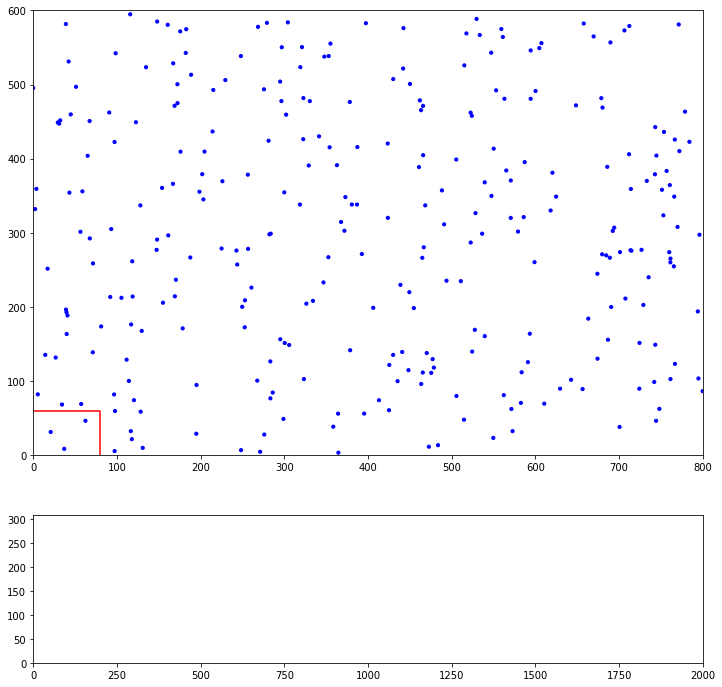

In [48]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.set_xlim(0, 800)
ax1.set_ylim(0, 600)

ax2.set_xlim(0,2000)
ax2.set_ylim(0,310)
lines, = ax2.plot([], [])
ax1.plot([0,80,80],[60,60,0], 'red')
scat = ax1.scatter([], [], s=10)

iters = []
num_humans = []

def animate(i):
    if i == 0:
        iters.clear()
        num_humans.clear()
    humans = data[i]['humans']
    points = np.array([(h['x'], h['y']) for h in humans])
    colors = ['blue' if len(h['viruses']) == 0 else 'red' for h in humans]
    scat.set_offsets(points)
    scat.set_color(colors)
    
    iters.append(i)
    num_humans.append(data[i]['num_humans'])
    lines.set_data(iters, num_humans)
    return (scat,lines)
    
ani = animation.FuncAnimation(fig, animate, 2000, interval=100, blit=True)

In [47]:
ani

In [49]:
ani.save('sim.mp4')